In [67]:
# Lab settings - please ingnore
options(repr.plot.width=7, repr.plot.height=4, repr.plot.res=250 ) # Make plots a resonable size

<div class="big_title">LAB 8: Temporal data and string manipulation plus web scrapping</div>

BIO3782: Biologist's Toolkit (Dalhousie University)

----------------------------------------

# Setup of workspace

<span class="important"></span> Make sure the required files are in the working directory:

* Create a **folder**  on the "desktop" and name it <span class="file">Lab8</span>
* Create a **sub-folder** called <span class="file">data_raw</span> inside your <span class="file">Lab8</span> folder. Ideally, you would keep your raw and cleaned data separate in case you ever needed your raw data again.
* From Brightspace, download the <span class="file">Weather_Data_2017.csv</span> and <span class="file">mlb2017_pitching.txt</span>files into your <span class="file">Desktop/Lab8/data_raw</span> folder:
* In RStudio, change the working directory to <span class="file">Desktop/Lab8</span>. Click here if you need a [refresher on the **working directory**](https://diego-ibarra.github.io/biol3782/week1/index.html#RStudio's-%22Working-Directory%22)
* In RStudio, create a new R script, name it <span class="file">lab8.r</span> and make sure you save it in <span class="file">Desktop\Lab8</span>. You will be writing and copy-pasting code to your <span class="file">lab8.r</span> file so that you can keep a record of all you did in this lab. Also, if your computer crashes, you can just re-run your file to get back up where you left.


As in previous labs, we'll try simulate "real-life" coding, by using the tags below to indicate when to use RStudio's <span class="editor"></span> and when to use the <span class="console"></span>: 


<br>
<div class="use_editor"></div>
<br><br>

<div class="use_console"></div>
<br><br>

----------------------------------------

Let's load up some packages that we'll need.

<br>
<div class="use_editor"></div>

In [ ]:
library('tidyverse')

# Temporal data

Time is a surprisingly difficult thing to get right sometimes. The problem is that so many people store time differently. French Canada uses 24-hr notation, while English-speaking Canada tends to use 12-hour notation. Then, in the US there is the habit of using month-day-year, rather than day-month-year. Time zones are a pain. This is just the start of where problems begin, and there is also daylight savings for part of the year in many countries. So, let's start with some notation.

## Date coding notation in R

There are several functions to manipulate dates, times, or both. It is generally recommended to stick to the simplest level you need, so stick with dates if you just have dates, and times with times. The date-only function is `as.Date()`.

Because there are so many ways to keep track of time, you often need to specify the specific **date-time notation** associated with your data, so that R can handle and convert dates and times into a standardized format. In `as.Date()`, the notation is:

| Code | Value |
| ------------- |:-------------:|
| %d | Day of the month (decimal number) |
| %m | Month (decimal number) |
| %b | Month (abbreviated) |
| %B | Month (full name) |
| %y | Year (2 digit) |
| %Y | Year (4 digit) |

For each piece of data one might look at, a date object can be created by passing a string into the `as.Date()` function and specifying what it looks like:

In [4]:
as.Date('15/01/2001', format='%d/%m/%Y', tz='AST')

[1] "2001-01-15"

Note that in `format=` argument you have to specify the **date-time notation** that matches your data, including any characters used to separate the elements of your date (e.g. `-`, `/`, `_`, etc.). The specific notation is this case is `%d` for "day", then a `/`, then a `%m` for "month", then another `/`, and finally `%Y` for year. Also, in this case, the time zone `tz=` is `AST` for Atlantic Standard Time.

## Date objects

Let's make the following two varibles:

<br>
<div class="use_console"></div>

In [25]:
date1 = '15/1/2021'

date2 = as.Date('15/1/2021', format='%d/%m/%Y', tz="America/Halifax")

Now lets print the two variables to screen by doing...

<br>
<div class="use_console"></div>

In [26]:
date1
date2

[1] "15/1/2021"

[1] "2021-01-15"

As you can see, both return something that looks like a date. Our brain quickly deduces that `'15/1/2021'` and `2021-01-15` are both dates, and in fact, they are the same date just with different format. However, R does not sees `date1` and `date2` the same way than your brain does. R sees `date1` as simply string of characters, like `'hello world'`, while R understand that `date2` is a **date object** that contains temporal information. This is evident if we query the class of those variables:

<br>
<div class="use_console"></div>

In [27]:
class(date1)

class(date2)

[1] "character"

[1] "Date"

Dates are weird because they are a mixture of units of uneven size - 12 months, with a range of days in them that vary by year are not easy to follow. Let's say you want to know how many days there are between a series of sampling dates. Calculating this by hand would be a nightmare to have to do, unless you cleverly stored your data in a date object, which allows you to do all kinds of "temporal math". We can determine the length of time between two dates by using the `diff()` function.

First let's create a vector of dates called `sample_dates`.  

<br>  
<div class="use_console"></div>

In [6]:
sample_dates = as.Date(c('2010-07-22', '2011-04-20', '2012-10-06', '2013-09-16', '2014-11-01', '2015-12-09', '2016-10-23', '2017-01-01', '2018-02-19'))

sample_dates

[1] "2010-07-22" "2011-04-20" "2012-10-06" "2013-09-16" "2014-11-01"
[6] "2015-12-09" "2016-10-23" "2017-01-01" "2018-02-19"

Next, let's compute the difference between each date.

<br>
<div class="use_console"></div>

In [7]:
diff(sample_dates)

Time differences in days
[1] 272 535 345 411 403 319  70 414

It's a good idea to specify the time zone where the time was collected as this will anchor time into a universal standard that can get ambiguous quickly (try sampling reefs on a trip across the Pacific and keeping track of what time zone you're in, or even what hemisphere, once you come back and look at the data). Time zones are a common pitfall, as names we use locally may not apply universally (everyone wants Eastern Standard Time it seems).

The [full list](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones) of time zones is long and can also be printed in R. Below is how to get the first 6 time zones:

<br>
<div class="use_console"></div>

In [28]:
OlsonNames() %>% 
  head()

[1] "Africa/Abidjan"     "Africa/Accra"       "Africa/Addis_Ababa"
[4] "Africa/Algiers"     "Africa/Asmara"      "Africa/Asmera"

<div class="Q"><br><br>

How many days passed between each of the assassinations of JFK (November 22, 1963), Malcolm X (February 21, 1965), and Martin Luther King Jr.(April 4, 1968) in the 1960's? 

<br><br><div class="qhelp"></div></div>

We can also create a column/vector of dates. We'll use the function `seq()`, which creates a sequence of things.

<br>
<div class="use_console"></div>

In [29]:
my_dates = seq(date2, length=20, by='week')
my_dates

[1] "2021-01-15" "2021-01-22" "2021-01-29" "2021-02-05" "2021-02-12"
 [6] "2021-02-19" "2021-02-26" "2021-03-05" "2021-03-12" "2021-03-19"
[11] "2021-03-26" "2021-04-02" "2021-04-09" "2021-04-16" "2021-04-23"
[16] "2021-04-30" "2021-05-07" "2021-05-14" "2021-05-21" "2021-05-28"

We have just created a vector of dates for 20 weeks starting from January 15,2021. Let's check to see if the dates are separated weekly (by 7 days). Let's check the time difference between each pair of elements in `my_dates`:

<br>
<div class="use_console"></div>

In [11]:
diff(my_dates)

Time differences in days
 [1] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

In most date systems, dates are really stored as integers, with some specific day in history being day zero. Excel famously uses 1900 but [wrongly identifying it as a leap year](https://en.wikipedia.org/wiki/Leap_year_bug) so as to maintain the Microsoft obsession with backward compatibility. In R, 1 January 1970 is year zero, following the tradition of [Unix](https://www.wired.com/2001/09/unix-tick-tocks-to-a-billion/).

To look at the integer day format for a datetime from the `my_dates` vector we created, we can use the following functions:

<br>
<div class="use_console"></div>

In [12]:
unclass(my_dates)

[1] 18642 18649 18656 18663 18670 18677 18684 18691 18698 18705 18712 18719
[13] 18726 18733 18740 18747 18754 18761 18768 18775

<div class="Q"><br><br>

How many days would pass between the first and last dates if we ran this string of code <b>seq(date2, length=20, by='day')</b>? 


<br><br><div class="qhelp"></div></div>

In addition to turning dates into numbers, `as.Date()` can also turn numbers into words. A few convenience functions:

* `weekdays`: returns the day of each date.

<br>
<div class="use_console"></div>

In [22]:
weekdays(sample_dates)

[1] "Thursday"  "Wednesday" "Saturday"  "Monday"    "Saturday"  "Wednesday"
[7] "Sunday"    "Sunday"    "Monday"

* `months`: returns the month of each date.

<br>
<div class="use_console"></div>

In [25]:
months(sample_dates)

[1] "July"      "April"     "October"   "September" "November"  "December" 
[7] "October"   "January"   "February"

* `quarter`: returns the yearly quarter of each date.

<br>
<div class="use_console"></div>

In [24]:
quarters(sample_dates)

[1] "Q3" "Q2" "Q4" "Q3" "Q4" "Q4" "Q4" "Q1" "Q1"

There is also the `julian` function which returns the number of days since time 0. 'Julian' here refers to the Julian calendar declared by Julius Caesar in 46 BC, use of which has continued from early adoption by astronomers due to the coincidence of three astronomical cycles on Monday, January 1, 4713 BC (which preceded any dates in recorded history).

<br>
<div class="use_console"></div>

In [27]:
julian(sample_dates)

[1] 14812 15084 15619 15964 16375 16778 17097 17167 17581
attr(,"origin")
[1] "1970-01-01"

It returns integers similar to the integer date format we talked about earlier.

<br>
<div class="use_console"></div>

In [30]:
unclass(sample_dates)

[1] 14812 15084 15619 15964 16375 16778 17097 17167 17581

## Datetime objects

If you also have times in your data (datetime data), you can create a `POSIX` object. The name POSIX is an acronym for [Portable Operating System Interface](https://en.wikipedia.org/wiki/POSIX) which is a set of standards for maintaining compatability of computer systems. POSIX notation adds additional arguments to how things are specified:<br><br>

| Code | Meaning | Code | Meaning |
| ------------- |:-------------:|:-------------:|:-------------:|
| %a | Abbreviated weekday | %A | Full weekday |
| %b | Abbreviated month | %B | Full month |
| %c | Locale-specific date and time | %d | Decimal date |
| %H | Decimal hours (24 hour) | %I | Decimal hours (12 hour) |
| %j | Decimal day of the year | %m | Decimal month |
| %M | Decimal minute | %p | Locale-specific AM/PM |
| %S | Decimal second | %U | Decimal week of the year (starting on Sunday) |
| %w | Decimal Weekday (0=Sunday) | %W | Decimal week of the year (starting on Monday) |
| %x | Locale-specific Date | %X | Locale-specific Time |
| %y | 2-digit year | %Y | 4-digit year |
| %z | Offset from GMT | %Z | Time zone (character) |

<br><br>Reflecting the various time components and conventions that people use globally.

In R, the POSIX conversions for datetime objects is handled by two functions:

1. `as.POSIXct()` creates an atomic object of the number of seconds since time zero (ct = calendar time)
2. `as.POSIXlt()` creates a list of time attributes (lt = list time)

Let's take a look at the difference between the two by creating two objects using similar dates.

<br>
<div class="use_console"></div>

In [36]:
time1 = as.POSIXct("2021-02-26 23:55:26")
time2 = as.POSIXlt("2021-02-26 23:55:23")

Here is the object we created with `POSIXct`

<br>
<div class="use_console"></div>

In [37]:
time1

unclass(time1)

[1] "2021-02-26 23:55:26 AST"

[1] 1614398126
attr(,"tzone")
[1] ""

Here is the object we created with `POSIXlt`

<br>
<div class="use_console"></div>

In [38]:
time2

unclass(time2)

[1] "2021-02-26 23:55:23 AST"

$sec
[1] 23

$min
[1] 55

$hour
[1] 23

$mday
[1] 26

$mon
[1] 1

$year
[1] 121

$wday
[1] 5

$yday
[1] 56

$isdst
[1] 0

$zone
[1] "AST"

$gmtoff
[1] NA

Because lists have more overhead computationally, unless you need the mixed categories, the best course is to stick with using `as.POSIXct`, where all the conversions are handled behind the scenes. `POSIXct` objects work a little more intuitively than the `as.Date` objects.

Let's take a look at the difference between the two time objects we created (time1,time2).

<br>
<div class="use_console"></div>

In [39]:
time1 - time2

Time difference of 3 secs

The fact that these work with seconds mean you can add to them coherently, provided you convert to seconds first.

<br>
<div class="use_console"></div>

In [40]:
time1 + 24*60*60

[1] "2021-02-27 23:55:26 AST"

<div class="Q"><br><br>

Use <b>POSIXct</b> to determine the number of <b>seconds</b> Apollo 11 took between take off (July 16, 1969, 13:32:00) and landing on the moon (July 20, 1969, 20:17:40 ) 

<br><br><div class="qhelp"></div></div>

<span class="note"></span> `POSIXct` objects will keep track of daylight savings time, which is applied "willy-nilly" among provinces, states, and countries.

<br>
<div class="use_console"></div>

In [41]:
as.POSIXct("2013-03-10 08:32:07") - as.POSIXct("2013-03-09 23:55:26")

Time difference of 8.611389 hours

##  strptime()

Finally there is also the `strptime()` function, which is an internal workhorse function to take a string and convert it into a time data type.

Let's create a dataframe called `events`.

<br>
<div class="use_console"></div>

In [42]:
events = data.frame(
    time=c("2014-01-23 14:28:21","2014-01-23 14:28:55","2014-01-23 14:29:02","2014-01-23 14:31:18"),
    speed=c(2.0,2.2,3.4,5.5))

events

time,speed
<chr>,<dbl>
2014-01-23 14:28:21,2.0
2014-01-23 14:28:55,2.2
2014-01-23 14:29:02,3.4
2014-01-23 14:31:18,5.5


Notice that the `time` variable is a character instead of a date (see the `<chr>` below the `time` column title?). We could use `mutuate` and `as.Date` to change it into the right format or we could use the `strptime` function instead.

<br>
<div class="use_console"></div>

In [45]:
events$time = strptime(events$time,"%Y-%m-%d %H:%M:%S")

events

time,speed
<dttm>,<dbl>
2014-01-23 14:28:21,2.0
2014-01-23 14:28:55,2.2
2014-01-23 14:29:02,3.4
2014-01-23 14:31:18,5.5


You can see now it shows `<dttm>` below the `time` column title.

<span class="note"></span> The problem with `strptime` is that it makes some assumptions that might mess things up for you if they go undetected. For example...

<br>
<div class="use_console"></div>

In [46]:
early = strptime("2000-01-01 00:00:00","%Y-%m-%d %H:%M:%S")
late1 = strptime("2000-01-01 00:00:20","%Y-%m-%d %H:%M:%S")

early - late1

Time difference of -20 secs

and...

<br>
<div class="use_console"></div>

In [47]:
late2 = strptime("2000-01-01 1:00:00","%Y-%m-%d %H:%M:%S")

early - late2

Time difference of -1 hours

... returns the results in different units (first in seconds, then in hours). This might mess you up if you're scripting to extract times like we do below.

<br>
<div class="use_console"></div>

In [48]:
as.numeric(early-late1)
as.numeric(early-late2)

[1] -20

[1] -1

<br><br><br>
<div class="startTASK"></div>

Most often, we won't create dates and times by hand. Instead we will import them from a flat file. [Here](http://www.urban-climate.net/content/data/9-data) we can download daily wind and rainfall data for London. 

For your convenience, we have provided the data from 2017 in the <span class="file">Weather_Data_2017.csv</span> file.

Using the Date.and.Time column timestamp, calculate the average length of time (in hours) between gale force (i.e. >34 knots) maximum gust records.

<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

How many observations from <b>Weather_Data_2017.csv</b> have hourly maximum gusts > 34 knots? 


<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the highest recorded hourly maximum gust? 


<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the length of time (in hours) between gale force (i.e. >34 kts) maximum gust records? 


<br><br><div class="qhelp"></div></div>

<br><br><br>
<div class="startTASK"></div>

Using <span class="file">Weather_Data_2017.csv</span>, plot hourly maximum gust through time.

<div class="endTASK"></div>
<br><br><br>

Your plot should look a bit like the one below:

<img src="time-series.png" width="800px">

# String Manipulation

A surprising amount of what people do with computers involves text - searching for and manipulating strings within a programming language. In biology, the area with the major lock on text manipulation is bioinformatics. As the name implies, bioinformatics deals with biological information - especially analysis of DNA, RNA and protein sequences. However, the challenges and scientific opportunities for analyzing the information are incredible. In its simplest form, we can represent DNA/RNA and protein as text -- either nucleic or amino acids. Each base or amino acid is represented as a single letter (e.g. A/C/G/T for DNA). Stored in the sequence of nucleic and amino acids are all the instructions to create life. So strings are important.

Among the simplest but most crucial attributes of strings is determining its length. We'll use the `nchar()` function for that.

<br>
<div class="use_console"></div>

In [50]:
protein = "vlspadktnv"

nchar(protein)

[1] 10

We can also take a slice of the string.  To grab a section of a string by its position of each letter, R has a `substr()` function.

<br>
<div class="use_console"></div>

In [109]:
substr(protein,1,3)

[1] "vls"

We can also split a string using the `strsplit()` function. We will use the character "a" to separate the strings.

<br>
<div class="use_console"></div>

In [51]:
strsplit(protein,'a')

[[1]]
[1] "vlsp"  "dktnv"

Notice here that the 'a' has disappeared. If we want to keep that 'a', we need to take a slice at the 'a' position. We can use the `gregexpr()` function to find the position of 'a'. 

<br>
<div class="use_console"></div>

In [269]:
gregexpr('a', protein)

[[1]]
[1] 5
attr(,"match.length")
[1] 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

For reasons known only to the original R programmers, this returns a list object, with a number at the beginning, followed by the position we're looking for. So to use this to get that index number, we need to index the list.

<br>
<div class="use_console"></div>

In [54]:
gregexpr('a', protein)[[1]]

[1] 5
attr(,"match.length")
[1] 1
attr(,"index.type")
[1] "chars"
attr(,"useBytes")
[1] TRUE

Let's explore string manipulation using the <span class="file">mlb2017_pitching.txt</span> dataset. First let's load the data.

<br>
<div class="use_editor"></div>

In [55]:
mlb_pitching <- na.omit(read.csv("mlb2017_pitching.txt"))

mlb_pitching  %>% 
  head()

,Rk,Name,Age,Tm,Lg,W,L,W.L.,ERA,G,...,WP,BF,ERA.,FIP,WHIP,H9,HR9,BB9,SO9,SO.W
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<int>,...,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Fernando Abad*\abadfe01,31,BOS,AL,2,1,0.667,3.30,48,...,0,182,140,3.68,1.237,8.2,0.8,2.9,7.6,2.64
3,3,Tim Adleman\adlemti01,29,CIN,NL,5,11,0.313,5.52,30,...,1,531,80,5.87,1.431,9.1,2.1,3.8,7.9,2.12
4,4,Andrew Albers*\alberan01,31,SEA,AL,5,1,0.833,3.51,9,...,1,178,121,4.13,1.293,9.4,1.3,2.2,8.1,3.70
5,5,Matt Albers\alberma01,34,WSN,NL,7,2,0.778,1.62,63,...,0,233,269,3.40,0.852,5.2,0.9,2.5,9.3,3.71
6,6,Al Alburquerque\albural01,31,TOT,AL,0,2,0.000,2.50,21,...,0,71,182,2.94,1.000,5.0,0.0,4.0,7.0,1.75
7,7,Al Alburquerque\albural01,31,KCR,AL,0,1,0.000,3.60,11,...,0,42,128,3.16,1.300,6.3,0.0,5.4,8.1,1.50


Next, let's clean it up a little by extracting only the first and last names of each of the players. For that, we need the help of **regular expressions**.

## Regular expressions

A [Regular expression](https://en.wikipedia.org/wiki/Regular_expression) (or regex) is a sequence of characters that specifies a **"search pattern"** to be used against a dataset made of characters. Regular expressions are really useful for sifting through and subsetting large textual datasets (like genetic sequences). Using them can impart superhero-like qualities:

<img src="regular_expressions.png" width="500px">

The power of regular expression lays on the ability to be able to include **"wild cards"** as part of the search pattern. The most common are shown below:


| Special characters (or wild card) | What does it do? |
| :--------- | :------ |
| **\.**   |  matches any single character   |      
| **\***  |  match preceding character/number 0 or more times   | 
| **\+**  |  match preceding character/number at least once  |  
| **\?**  |   match preceding character/number exactly once  |  
| **\**  | suppresses special meanings. Use this if you want to search for one of the special characters in your string |
| **&Hat;**  |   matches the beginning of the string | 
| **\$**   |   matches the end of a string |
| **[]**   |    match any characters inside the square brackets   | 
| **[^]**  |    match any characters *except* those inside the brackets  |  
| **{n}**  |   match preceding character n times    | 
| **\{n,m\}**  |   match preceding character between n and m times   | 
| **\n**   |    new line   | 
| **\t**  | tab   | 

<br>

Below are some of the things you can do with regular expressions:

###  Find values in strings/vectors that match your desired pattern or sequence 

Let's go back to our example with baseball players. We were about to clean up the "Name" column by extracting only the first and last names of each of the players. We can use the `str_extract()` function for that. `str_extract()` extracts matching patterns from a string.

<br>
<div class="use_editor"></div>

In [158]:
mlb_pitching <- mlb_pitching %>% 
  mutate(Name_clean = str_extract(Name,"[A-Z][a-z]+ [A-Z][a-z]+"))

mlb_pitching  %>% 
  select(Name,Name_clean) %>% 
  head()

,Name,Name_clean
,<chr>,<chr>
1,Fernando Abad*\abadfe01,Fernando Abad
3,Tim Adleman\adlemti01,Tim Adleman
4,Andrew Albers*\alberan01,Andrew Albers
5,Matt Albers\alberma01,Matt Albers
6,Al Alburquerque\albural01,Al Alburquerque
7,Al Alburquerque\albural01,Al Alburquerque


We can also find all instances of a pattern. For instance, we can find all the players with the name "Jim". We will use `grep()` for this. `grep()` returns the position of each instance of the search string, so we can also use them inside an indexing statement to find other values.

Note that we will be using the `^` character to indicate the beginning of a string (i.e. we do not want last names with the word "jim" in it, like "Jimenez").

<br>
<div class="use_console"></div>

In [59]:
grep("^Jim", mlb_pitching$Name)

[1] 328 455 711

Notice it returned the row index of the players with the name Jim. To return the actual entry, we will have to combined `grep()` with some indexing.

<br>
<div class="use_console"></div>

In [60]:
mlb_pitching$Name[grep("^Jim", mlb_pitching$Name)]

[1] "Jim Johnson\\johnsji04"     "Jimmy Nelson\\nelsoji02"   
[3] "Jimmy Yacabonis\\yacabji01"

Slightly more powerfully than just the "Jims" is to figure out quantities, for example what proportion of players are in their 30's?

<br>
<div class="use_console"></div>

In [61]:
length(grep("3.", mlb_pitching$Age))/length(mlb_pitching$Age)

[1] 0.3551532

<br><span class="note"></span> `grep` finds and matches the strings in the `Age` column that begin with "3".


<div class="Q"><br><br>

How many distinct pitchers are there in <b>mlb_pitching</b>? 


<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What proportion of players are over 40yrs old? 


<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Who are the players over 40yrs old? 


<br><br><div class="qhelp"></div></div>

### Return logical vectors that match your pattern  

The `grepl()` function will return TRUE if conditions are satisfied, and FALSE if not. Here you have to use the standard escape character `\` to stop the function of `*` as a special character:

<br>
<div class="use_console"></div>

In [159]:
mlb_pitching$Name[grepl("\\*", mlb_pitching$Name)]

[1] "Fernando Abad*\\abadfe01"      "Andrew Albers*\\alberan01"    
  [3] "Scott Alexander*\\alexasc02"   "Jose Alvarado*\\alvarjo03"    
  [5] "Dario Alvarez*\\alvarda01"     "Jose Alvarez*\\alvarjo02"     
  [7] "Brett Anderson*\\anderbr04"    "Brett Anderson*\\anderbr04"   
  [9] "Brett Anderson*\\anderbr04"    "Tyler Anderson*\\anderty01"   
 [11] "Jayson Aquino*\\aquinja01"     "Luis Avilan*\\avilalu01"      
 [13] "Anthony Banda*\\bandaan01"     "Antonio Bastardo*\\bastaan01" 
 [15] "Buddy Baumann*\\baumabu01"     "Jeff Beliveau*\\belivje01"    
 [17] "Chad Bell*\\bellch02"          "Ty Blach*\\blachty01"         
 [19] "Richard Bleier*\\bleieri01"    "Jerry Blevins*\\blevije01"    
 [21] "Buddy Boshers*\\boshebu01"     "Matthew Boyd*\\boydma01"      
 [23] "Steven Brault*\\braulst01"     "Craig Breslow*\\breslcr01"    
 [25] "Craig Breslow*\\breslcr01"     "Zach Britton*\\brittza01"     
 [27] "Rex Brothers*\\brothre01"      "Ryan Buchter*\\buchtry01"     
 [29] "Ryan Buchter*\\buchtry01"      "Ryan Buchter*\\buchtry01"     
 [31] "Madison Bumgarner*\\bumgama01" "Aaron Bummer*\\bummeaa01"     
 [33] "Brett Cecil*\\cecilbr01"       "Xavier Cedeno*\\cedenxa01"    
 [35] "Andrew Chafin*\\chafian01"     "Aroldis Chapman*\\chapmar01"  
 [37] "Wei-Yin Chen*\\chenwe02"       "Alex Claudio*\\claudal01"     
 [39] "Adam Conley*\\conlead01"       "Patrick Corbin*\\corbipa01"   
 [41] "Danny Coulombe*\\couloda01"    "Grant Dayton*\\daytogr01"     
 [43] "Jorge De La Rosa*\\rosajo01"   "Matt Dermody*\\dermoma01"     
 [45] "Sean Doolittle*\\doolise01"    "Sean Doolittle*\\doolise01"   
 [47] "Sean Doolittle*\\doolise01"    "Brian Duensing*\\duensbr01"   
 [49] "Danny Duffy*\\duffyda01"       "Zach Duke*\\dukeza01"         
 [51] "Mike Dunn*\\dunnmi01"          "Josh Edgin*\\edginjo01"       
 [53] "Brandon Finnegan*\\finnebr01"  "Kyle Freeland*\\freelky01"    
 [55] "Sam Freeman*\\freemsa01"       "Max Fried*\\friedma01"        
 [57] "Jaime Garcia*\\garcija02"      "Jaime Garcia*\\garcija02"     
 [59] "Jaime Garcia*\\garcija02"      "Jaime Garcia*\\garcija02"     
 [61] "Jaime Garcia*\\garcija02"      "Jarlin Garcia*\\garcija04"    
 [63] "Onelki Garcia*\\garcion01"     "Amir Garrett*\\garream01"     
 [65] "Luiz Gohara*\\goharlu01"       "Marco Gonzales*\\gonzama02"   
 [67] "Marco Gonzales*\\gonzama02"    "Gio Gonzalez*\\gonzagi01"     
 [69] "Matt Grace*\\gracema02"        "Josh Hader*\\haderjo01"       
 [71] "Cole Hamels*\\hamelco01"       "Brad Hand*\\handbr01"         
 [73] "J.A. Happ*\\happja01"          "Blaine Hardy*\\hardybl01"     
 [75] "Donnie Hart*\\hartdo01"        "Andrew Heaney*\\heanean01"    
 [77] "Rich Hill*\\hillri01"          "Derek Holland*\\hollade01"    
 [79] "David Holmberg*\\holmbda01"    "J.P. Howell*\\howeljp01"      
 [81] "Dan Jennings*\\jennida01"      "Dan Jennings*\\jennida01"     
 [83] "Brian Johnson*\\johnsbr02"     "Clayton Kershaw*\\kershcl01"  
 [85] "Dallas Keuchel*\\keuchda01"    "Adam Kolarek*\\kolarad01"     
 [87] "Ian Krol*\\krolia01"           "Wade LeBlanc*\\leblawa01"     
 [89] "Jon Lester*\\lestejo01"        "Francisco Liriano*\\liriafr01"
 [91] "Francisco Liriano*\\liriafr01" "Francisco Liriano*\\liriafr01"
 [93] "Jeff Locke*\\lockeje01"        "Boone Logan*\\loganbo02"      
 [95] "Aaron Loup*\\loupaa01"         "Tyler Lyons*\\lyonsty01"      
 [97] "Sean Manaea*\\manaese01"       "Steven Matz*\\matzst01"       
 [99] "Tim Mayza*\\mayzati01"         "T.J. McFarland*\\mcfartj01"   
[101] "Jake McGee*\\mcgeeja01"        "Adalberto Mejia*\\mejiaad01"  
[103] "Yohander Mendez*\\mendeyo01"   "Ryan Merritt*\\merriry01"     
[105] "Wade Miley*\\mileywa01"        "Andrew Miller*\\millean01"    
[107] "Tommy Milone*\\milonto01"      "Tommy Milone*\\milonto01"     
[109] "Tommy Milone*\\milonto01"      "Mike Minor*\\minormi01"       
[111] "A.J. Minter*\\minteaj01"       "Ariel Miranda*\\miranar01"    
[113] "Jordan Montgomery*\\montgjo01" "Mike Montgomery*\\montgmi01"  
[115] "Matt 

With this, you can then do typical boolean indexing. 

### Find and replace values that match your pattern

If you or your data provider has a spelling problem, you can correct them on the fly with the `gsub()` find and replace function. For example, we can change the name of all the players called "Tyler" to "Superman".


<br>
<div class="use_console"></div>

In [161]:
mlb_pitching$Name <- gsub("Tyler", "Superman", mlb_pitching$Name)

mlb_pitching$Name[grep("^Superman", mlb_pitching$Name)]

[1] "Superman Anderson*\\anderty01" "Superman Chatwood\\chatwty01" 
 [3] "Superman Clippard\\clippty01"  "Superman Clippard\\clippty01" 
 [5] "Superman Clippard\\clippty01"  "Superman Clippard\\clippty01" 
 [7] "Superman Duffey\\duffety01"    "Superman Glasnow\\glasnty01"  
 [9] "Superman Lyons*\\lyonsty01"    "Superman Mahle\\mahlety01"    
[11] "Superman Pill\\pillty01"       "Superman Skaggs*\\skaggty01"  
[13] "Superman Wilson\\wilsoty01"

Probably a more useful thing for this data is filtering out parts of the string we don't want. Let's get rid of all the text after the back-slashes.

<br>
<div class="use_console"></div>

In [162]:
mlb_pitching$Name <- gsub("\\\\.{1,20}", "", mlb_pitching$Name)

mlb_pitching$Name[1:10]

[1] "Fernando Abad*"   "Tim Adleman"      "Andrew Albers*"   "Matt Albers"     
 [5] "Al Alburquerque"  "Al Alburquerque"  "Al Alburquerque"  "Raul Alcantara"  
 [9] "Scott Alexander*" "Cody Allen"

<div class="Q"><br><br>

Why are there three "Al Alburquerque" in the MLB pitching data? 


<br><br><div class="qhelp"></div></div>

# Web scraping

Among the more functional and powerful things R can do is to pull down information from the web and process it for use. The library to do this is `rvest` created (again) by [Hadley Wickham](https://blog.rstudio.com/2014/11/24/rvest-easy-web-scraping-with-r/). This is a deep topic that requires some insight into `html`, a tag-driven programming language that powers most of the web.

## What is Web scraping?

Web scraping is a technique for converting the data present in unstructured format (HTML tags) over the web to the structured format which can easily be accessed and used. Almost all the main languages provide ways for performing web scraping.

<br>
<img src="web_scraping.png" width="500px">
<br>

## Ways to scrape data
There are several ways of scraping data from the web. Some of the popular ways are:

1. Human Copy-Paste: This is a slow and efficient way of scraping data from the web. This involves humans themselves analyzing and copying the data to local storage.
1. Text pattern matching: Another simple yet powerful approach to extract information from the web is by using regular expression matching facilities of programming languages (we learned regular expressions in R in a section above).
1. API Interface: Many websites like Facebook, Twitter, LinkedIn, etc. provides public and/ or private APIs which can be called using the standard code for retrieving the data in the prescribed format.
1. DOM Parsing: By using web browsers, programs can retrieve the dynamic content generated by client-side scripts. It is also possible to parse web pages into a DOM tree, based on which programs can retrieve parts of these pages.

We’ll use the DOM parsing approach during the course of this tutorial and rely on the CSS selectors of the webpage for finding the relevant fields which contain the desired information. But before we begin there are a few prerequisites that one need in order to proficiently scrape data from any website.

## Understanding a web page

Before we can start learning how to scrape a web page, we need to understand how a web page itself is structured.

From a user perspective, a web page has text, images and links all organized in a way that is aesthetically pleasing and easy to read. But the web page itself is written in specific coding languages that are then interpreted by our web browsers. When we're web scraping, we’ll need to deal with the actual contents of the web page itself: the code before it’s interpreted by the browser.

<span class="note"></span> If you want to see "the code" of this website (i.e. Lab 8), simply click `Ctr + u`, or `Command + u` in Mac (this should work in most modern browsers).

The main languages used to build web pages are called Hypertext Markup Language (HTML), Cascading Style Sheets (CSS) and Javascript. HTML gives a web page its actual structure and content. CSS gives a web page its style and look, including details like fonts and colors. Javascript gives a webpage functionality.

In this tutorial, we’ll focus mostly on how to use R web scraping to read the HTML and CSS that make up a web page.

### HTML

Unlike R, HTML is not a programming language. Instead, it’s called a markup language — it describes the content and structure of a web page. HTML is organized using tags, which are surrounded by **<>** symbols. Different tags perform different functions. Together, many tags will form and contain the content of a web page.

The text below is a legitimate HTML document. If we were to save that as a .html file and open it using a web browser, we would see a page saying:

    Here's a paragraph of text!
    Here's a second paragraph of text!


In [ ]:
<html>
<head>
</head>

<body>
 <p>Here's a paragraph of text!</p>
 <p>Here's a second paragraph of text!</p>
</body>
</html>

Notice that each of the tags are “paired” in a sense that each one is accompanied by another with a similar name. That is to say, the opening `<html>` tag is paired with another tag `</html>` that indicates the beginning and end of the HTML document. The same applies to `<body>` and `<p>`.

The `<html>` `</html>` tags specify the begging and end of HTML content. The `<head>` `</head>` and `<body>` `<body>` tags, add more structure to the document specifying beginning and end of headers and main body of the file, respectively. The `<p>``</p>` tags are what we use in HTML to designate paragraphs.

There are many, many tags in HTML, but we won’t be able to cover all of them in this tutorial. If interested, you can check out this [site](https://developer.mozilla.org/en-US/docs/Web/HTML/Element). The important takeaway is to know that tags have particular names (html, body, p, etc.) to make them identifiable in an HTML document.

Having opening and ending tags (e.g. `<p>``</p>`) is important, because it allows tags to be nested within each other. The `<body>` and `<head>` tags are nested within `<html>`, and `<p>` is nested within `<body>`. This nesting gives HTML a “tree-like” structure:

<img src="html-structure.png">

This tree-like structure will inform how we look for certain tags when we're using R for web scraping, so it’s important to keep it in mind. If a tag has other tags nested within it, we would refer to the containing tag as the parent and each of the tags within it as the “children”. If there is more than one child in a parent, the child tags are collectively referred to as “siblings”. These notions of parent, child and siblings give us an idea of the hierarchy of the tags.

### CSS

Whereas HTML provides the content and structure of a web page, CSS provides information about how a web page should be styled. Without CSS, a web page is dreadfully plain. Here's a simple HTML document [without CSS](http://dataquestio.github.io/web-scraping-pages/simple.html) that demonstrates this. 

When we say styling, we are referring to a wide, wide range of things. Styling can refer to the attributes (e.g. color, size, position, font, alignment, etc.) of particular HTML elements. Like HTML, the scope of CSS material is so large that we can’t cover every possible concept in the language. If you’re interested, you can learn more [here](https://www.w3.org/Style/CSS/Overview.en.html).

Two concepts we do need to learn before we delve into the R web scraping code are **classes and ids**.

First, let's talk about classes. If we were making a website, there would often be times when we'd want similar elements of a website to look the same. For example, we might want a number of items in a list to all appear in the same color, red.

We could accomplish that by directly inserting some CSS that contains the color information into each line of text's HTML tag, like so:

In [ ]:
<p style=”color:red” >Text 1</p>
<p style=”color:red” >Text 2</p>
<p style=”color:red” >Text 3</p>

The `style` text indicates that we are trying to apply CSS to the `<p>` tags. Inside the quotes, we see a key-value pair “color:red”. `color` refers to the color of the text in the `<p>` tags, while red describes what the color should be.

If we wanted to change the color of that text, we'd have to change each line one by one.

Instead of repeating this style text in all of these `<p>` tags, we can replace it with a class selector:

In [ ]:
<p class=”red-text” >Text 1</p>
<p class=”red-text” >Text 2</p>
<p class=”red-text” >Text 3</p>

The `class` selector, we can better indicate that these `<p>` tags are related in some way. In a separate CSS file, we can create the red-text class and define how it looks by writing:

In [ ]:
.red-text {
    color : red;
}

Combining these two elements into a single web page will produce the same effect as the first set of red `<p>` tags, but it allows us to make quick changes more easily. 

In this tutorial, of course, we're interested in web scraping, not building a web page. But when we're web scraping, we'll often need to select a specific class of HTML tags, so we need understand the basics of how CSS classes work.

Similarly, we may often want to scrape specific data that's identified using an id. CSS ids are used to give a single element an identifiable name, much like how a class helps define a class of elements.

If an id is attached to a HTML tag, it makes it easier for us to identify this tag when we are performing our actual web scraping with R.

In [ ]:
<p id=”special” >This is a special tag.</p>

Don’t worry if you don’t quite understand classes and ids yet, it’ll become more clear when we start manipulating the code.

## Web scraping imdb website

There are several R libraries designed to take HTML and CSS and be able to traverse them to look for particular tags. The library we’ll use is `rvest`.

In this tutorial, we’ll use R for scraping the data for the most popular feature films of 2019 from the IMDb website.

We’ll get a number of features for each of the 100 popular feature films released in 2019. Also, we’ll look at the most common problems that one might face while scraping data from the internet because of the lack of consistency in the website code and look at how to solve these problems.

If you do have `rvest` installed...

<br>
<div class="use_console"></div>

In [ ]:
install.packages('rvest')

Then, load the library:

<br>
<div class="use_editor"></div>

In [ ]:
library('rvest')

Let's specify a url for the desired website, that loads the first 100 titles of 2019. 

Now, as new films are added to the imdb website, the content returned by the url query may vary over time. We purposely chose a year in the past (2019) to avoid this, but changes can still happen (actually changes just happened in the last week). Therefore, I downloaded a copy of the imdb website in my github account, we will use this copy for the web scraping exercises of this lab. However, below you can see as a comment the actual url that you could use if you want to perform the web scraping on the live imdb site. 

<br>
<div class="use_editor"></div>

In [150]:
# url for this lab
url <- 'https://raw.githubusercontent.com/Diego-Ibarra/biol3782/main/week8/imdb_100titles_2019.html'

# url of actual live imdb website
# url <- 'http://www.imdb.com/search/title?count=100&release_date=2019,2019&title_type=feature'

Next, let's read the html code from the website.

<br>
<div class="use_editor"></div>

In [151]:
webpage <- read_html(url)

Now, we’ll be scraping the following data from this website.

* Rank: The rank of the film from 1 to 100 on the list of 100 most popular feature films released in 2019.
* Title: The title of the feature film.
* Description: The description of the feature film.
* Runtime: The duration of the feature film.
* Genre: The genre of the feature film,
* Rating: The IMDb rating of the feature film.
* Metascore: The metascore on IMDb website for the feature film.
* Votes: Votes cast in favor of the feature film.
* Gross_Earning_in_Mil: The gross earnings of the feature film in millions.
* Director: The main director of the feature film. Note, in case of multiple directors, I’ll take only the first.
* Actor: The main actor in the feature film. Note, in case of multiple actors, I’ll take only the first.

Here’s a screenshot that contains how all these fields are arranged.

<img src="imdb1.png">

### Rank

Now, we will start by scraping the Rank field. For that, we’ll use the selector gadget to get the specific CSS selectors that encloses the rankings. You can click on the extension in your browser and select the rankings field with the cursor. 

To see the html code in Google Chrome, you can go to Options -> More tools -> Developer tools or hit `Ctrl` + `Shift` + `I` (for Windows).

First let's select the ranking. Highlight the "1." beside "Captain Marvel" and hit `Ctrl` + `Shift` + `I` or right click and select "inspect". This should take you to rank css on the source page. 

Once you are sure that you have made the right selections, you need to copy the corresponding CSS selector. In our case, it's **text-primary**.

Once you know the CSS selector that contains the rankings, you can use this simple R code to get all the rankings.

We will use the `html_nodes` function to extract pieces of data out of HTML documents using CSS selector. You can use the help section to take a look at the code syntax for `html_node`.

<br>
<div class="use_editor"></div>

In [152]:
#Using CSS selectors to scrape the rankings section
rank_data_html <- html_nodes(webpage,'.text-primary')

Next, we will use `html_text` to extract attributes, text and tag name from html.

<br>
<div class="use_editor"></div>

In [153]:
#Converting the ranking data to text
rank_data <- html_text(rank_data_html)

Now let's see if it pulled out the rankings.

<br>
<div class="use_console"></div>

In [154]:
head(rank_data)

[1] "1." "2." "3." "4." "5." "6."

Once you have the data, make sure that it looks in the desired format. In our case, we would convert the text to numeric.

<br>
<div class="use_editor"></div>

In [155]:
rank_data <- as.numeric(rank_data)

Now we can select all the titles. You can visually inspect that all the titles are selected.

<img src="imdbtitle.png">

### Title

Let's scrape all the titles using the `lister-item-header a` CSS tag.

<br>
<div class="use_editor"></div>

In [156]:
title_data_html <- html_nodes(webpage,'.lister-item-header a')

#Converting the title data to text
title_data <- html_text(title_data_html)

Let's have a look at the first 6 titles.

<br>
<div class="use_console"></div>

In [157]:
head(title_data)

[1] "Avengers: Endgame"                "Captain Marvel"                  
[3] "Sound of Metal"                   "Parasite"                        
[5] "Once Upon a Time... In Hollywood" "Knives Out"

In the following code, we will do the same thing for scraping Description, Runtime, Genre, Rating, Metascore, Votes, Gross_Earning_in_Mil , Director and Actor data.

<span class="important"></span> Notice the web scrapping code is relatively similar across the criteria but CSS tags are different.
 
### Description

<br>
Let's scrape film Description data from the webpage.

<br>
<div class="use_editor"></div>

In [158]:
#Using CSS selectors to scrape the description section
description_data_html <- html_nodes(webpage,'.ratings-bar+ .text-muted')

#Converting the description data to text
description_data <- html_text(description_data_html)

description_data %>% 
 head()

[1] "\n    After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe."
[2] "\n    Carol Danvers becomes one of the universe's most powerful heroes when Earth is caught in the middle of a galactic war between two alien races."                                                                                      
[3] "\n    A heavy-metal drummer's life is thrown into freefall when he begins to lose his hearing."                                                                                                                                            
[4] "\n    Greed and class discrimination threaten the newly formed symbiotic relationship between the wealthy Park family and the destitute Kim clan."                                                                                         
[5] "\n    A faded television actor and his stunt double strive to achieve fame and success in the final years of Hollywood's Golden Age in 1969 Los Angeles."                                                                                  
[6] "\n    A detective investigates the death of a patriarch of an eccentric, combative family."

Notice that each entry begins with "\n". We will need to remove that using the `gsub` function.
<br><br>
<div class="use_editor"></div>

In [159]:
#Removing '\n'
description_data <- gsub("\n","",description_data)

head(description_data)

[1] "    After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe."
[2] "    Carol Danvers becomes one of the universe's most powerful heroes when Earth is caught in the middle of a galactic war between two alien races."                                                                                      
[3] "    A heavy-metal drummer's life is thrown into freefall when he begins to lose his hearing."                                                                                                                                            
[4] "    Greed and class discrimination threaten the newly formed symbiotic relationship between the wealthy Park family and the destitute Kim clan."                                                                                         
[5] "    A faded television actor and his stunt double strive to achieve fame and success in the final years of Hollywood's Golden Age in 1969 Los Angeles."                                                                                  
[6] "    A detective investigates the death of a patriarch of an eccentric, combative family."

We will do similar things to the next set of data.

### Runtime 

<br>
Let's scrape the website data for Runtime.

<br>
<div class="use_editor"></div>

In [160]:
#Using CSS selectors to scrape the Movie runtime section
runtime_data_html <- html_nodes(webpage,'.text-muted .runtime')

#Converting the runtime data to text
runtime_data <- html_text(runtime_data_html)

head(runtime_data)

[1] "181 min" "123 min" "120 min" "132 min" "161 min" "130 min"

To make it easier to deal with later, let's remove "min" and convert the data to numeric.

<br>
<div class="use_editor"></div>

In [161]:
#Removing mins and converting it to numerical

runtime_data <- gsub(" min","",runtime_data)
runtime_data <- as.numeric(runtime_data)

head(runtime_data)

[1] 181 123 120 132 161 130

### Genre 

<br>
Let's scrape the website data for Genre.

<br>
<div class="use_editor"></div>

In [162]:
#Using CSS selectors to scrape the Movie genre section
genre_data_html <- html_nodes(webpage,'.genre')

#Converting the genre data to text
genre_data <- html_text(genre_data_html)

head(genre_data)

[1] "\nAction, Adventure, Drama            " 
[2] "\nAction, Adventure, Sci-Fi            "
[3] "\nDrama, Music            "             
[4] "\nComedy, Drama, Thriller            "  
[5] "\nComedy, Drama            "            
[6] "\nComedy, Crime, Drama            "

Notice we have "\n" and excess spaces. let's remove that to clean up the data.

<br>
<div class="use_editor"></div>

In [163]:
#Removing \n
genre_data <- gsub("\n","",genre_data)

#Removing excess spaces
genre_data <- gsub(" ","",genre_data)

head(genre_data)

[1] "Action,Adventure,Drama"  "Action,Adventure,Sci-Fi"
[3] "Drama,Music"             "Comedy,Drama,Thriller"  
[5] "Comedy,Drama"            "Comedy,Crime,Drama"

Now let's only take the first genre of each movie and convert the data from characters to factors.

<br>
<div class="use_editor"></div>

In [164]:
#taking only the first genre of each movie
genre_data <- gsub(",.*","",genre_data)

#Convering each genre from text to factor
genre_data <- as.factor(genre_data)

head(genre_data)

[1] Action Action Drama  Comedy Comedy Comedy
10 Levels: Action Adventure Animation Biography Comedy Crime Drama ... Mystery

### Rating

<br>
Let's scrape the website data for Rating.

<br>
<div class="use_editor"></div>

In [165]:
#Using CSS selectors to scrape the IMDB rating section
rating_data_html <- html_nodes(webpage,'.ratings-imdb-rating strong')

#Converting the ratings data to text
rating_data <- html_text(rating_data_html)

str(rating_data)

 chr [1:100] "8.4" "6.9" "7.8" "8.6" "7.6" "7.9" "7.8" "8.4" "7.1" "8.3" ...


Notice that rating data is saved as characters (Because that's what html_text does!). Let's change it to numeric data.

<br>
<div class="use_editor"></div>

In [166]:
#Converting ratings to numeric
rating_data <- as.numeric(rating_data)

head(rating_data)

[1] 8.4 6.9 7.8 8.6 7.6 7.9

### Votes

<br>
Let's scrape the website data for Votes. We will apply similar processes as above. First we'll read in the data, remove extra characters then convert it to numeric.

<br>
<div class="use_editor"></div>

In [167]:
#Using CSS selectors to scrape the votes section
votes_data_html <- html_nodes(webpage,'.sort-num_votes-visible span:nth-child(2)')

#Converting the votes data to text
votes_data <- html_text(votes_data_html)

#Removing commas
votes_data <- gsub(",","",votes_data)

#Converting votes to numerical
votes_data <- as.numeric(votes_data)

head(votes_data)

[1] 825771 451581  36445 569876 561190 466860

### Director

<br>
Let's scrape the website data for data on Directors. First we'll read in the data then convert it from characters to factors.

<br>
<div class="use_editor"></div>

In [168]:
#Using CSS selectors to scrape the directors section
directors_data_html <- html_nodes(webpage,'.text-muted+ p a:nth-child(1)')

#Converting the directors data to text
directors_data <- html_text(directors_data_html)

#Converting directors data into factors
directors_data <- as.factor(directors_data)

head(directors_data)


[1] Anthony Russo     Anna Boden        Darius Marder     Bong Joon Ho     
[5] Quentin Tarantino Rian Johnson     
99 Levels: Adam Randall Adam Robitel Adam Shankman ... Woody Allen

### Actor 

<br>
Let's scrape the website data for names of Actors. First we'll read in the data then convert it from characters to factors.

<br>
<div class="use_editor"></div>

In [169]:
#Using CSS selectors to scrape the actors section
actors_data_html <- html_nodes(webpage,'.lister-item-content .ghost+ a')

#Converting the gross actors data to text
actors_data <- html_text(actors_data_html)

#Converting actors data into factors
actors_data <- as.factor(actors_data)

head(actors_data)

[1] Robert Downey Jr. Brie Larson       Riz Ahmed         Kang-ho Song     
[5] Leonardo DiCaprio Daniel Craig     
96 Levels: Aaron Paul Adam Driver Adam Sandler Anthony Mackie ... Zack Gottsagen

### Metascore

<br>
Let's read in and examine the data.

<br>
<div class="use_editor"></div>

In [170]:
#Using CSS selectors to scrape the metascore section
metascore_data_html <- html_nodes(webpage,'.metascore')

#Converting the runtime data to text
metascore_data <- html_text(metascore_data_html)

#Removing extra space in metascore
metascore_data <- gsub(" ","",metascore_data)

head(metascore_data)

[1] "78" "64" "82" "96" "83" "82"

This is great, but because `metascore_data` is made up of characters, we cannot do math or calculate statistics with this data. See what happens when we try to compute descriptive statistics:

<br>
<div class="use_console"></div>

In [171]:
summary(metascore_data)

   Length     Class      Mode 
      100 character character 

As you can see, the `summary()` function cannot return min, max, median, mean, etc. because this metrics cannot be computed on characters (i.e. "letters").

We should convert the characters to numeric!

<br>
<div class="use_editor"></div>

In [172]:
#converting metascore to numerical
metascore_data <- as.numeric(metascore_data)

head(metascore_data)

[1] 78 64 82 96 83 82

Let's take a look at the summary of `metascore_data` again...

<br>
<div class="use_console"></div>

In [173]:
summary(metascore_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   51.75   61.00   61.44   73.00   96.00 

Great! We computed descriptive statistics! 


--------------------

### Gross

<br>
Here there is the problem that not all entries have reported grossed earning. We want those missing values to be filled with `NaN`. We will the `html_node()` function (See `?html_nodes` for the difference between `html_node` and `html_nodes`) to fill with `NaN`. Note that instead of using `webpage` as input, we will use the output of `html_nodes(webpage, '.lister-item-content')` as input:

<br>
<div class="use_editor"></div>

In [174]:
#Using CSS selectors to scrape the gross revenue section
gross_data_html <- html_node(html_nodes(webpage, '.lister-item-content'), '.sort-num_votes-visible span:nth-child(5)')

#Converting the gross revenue data to text
gross_data <- html_text(gross_data_html)

length(gross_data)

head(gross_data)

[1] 100

[1] "$858.37M" "$426.83M" NA         "$53.37M"  "$142.50M" "$165.36M"

Note that we got 100 elements, with `NaN` where there are missing grossed earnings.

Let's clean up the data by eliminating `$` and `M`, and converting to numeric values.

<br>
<div class="use_editor"></div>

In [175]:
#Removing '$' and 'M' signs
gross_data <- gsub("M","",gross_data)

gross_data <- substring(gross_data,2,6)

#converting gross_data to numerical
gross_data <- as.numeric(gross_data)

gross_data  %>% 
 head()

[1] 858.30 426.80     NA  53.37 142.50 165.30

Now let's check the statistics summary:

<br>
<div class="use_editor"></div>

In [176]:
summary(metascore_data)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  19.00   51.75   61.00   61.44   73.00   96.00 

Now that we have successfully scraped all the 11 features for the 100 most popular feature films released in 2019. Let’s combine them to create a data frame and inspect its structure.

<br>
<div class="use_editor"></div>

In [177]:
#Combining all the lists to form a data frame

movies_df <- data.frame(Rank = rank_data, Title = title_data,
                      Description = description_data, Runtime = runtime_data,
                      Genre = genre_data, Rating = rating_data,
                      Metascore = metascore_data, 
                      Votes = votes_data,
                      Gross_Earning_in_Mil = gross_data,
                      Director = directors_data, Actor = actors_data)

str(movies_df)

'data.frame':	100 obs. of  11 variables:
 $ Rank                : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Title               : chr  "Avengers: Endgame" "Captain Marvel" "Sound of Metal" "Parasite" ...
 $ Description         : chr  "    After the devastating events of Avengers: Infinity War (2018), the universe is in ruins. With the help of r"| __truncated__ "    Carol Danvers becomes one of the universe's most powerful heroes when Earth is caught in the middle of a ga"| __truncated__ "    A heavy-metal drummer's life is thrown into freefall when he begins to lose his hearing." "    Greed and class discrimination threaten the newly formed symbiotic relationship between the wealthy Park fa"| __truncated__ ...
 $ Runtime             : num  181 123 120 132 161 130 113 122 148 119 ...
 $ Genre               : Factor w/ 10 levels "Action","Adventure",..: 1 1 7 5 5 5 1 6 7 7 ...
 $ Rating              : num  8.4 6.9 7.8 8.6 7.6 7.9 7.8 8.4 7.1 8.3 ...
 $ Metascore           : num  78 64 82 96 83 82

# Analyzing scraped data from the web

Once you have the data, you can perform several tasks like analyzing the data, drawing inferences from it, training machine learning models over this data, etc. I have gone on to create some interesting visualization out of the data we have just scraped.

Let's take a look at the distribution of movies by runtime and genre.

<br>
<div class="use_editor"></div>

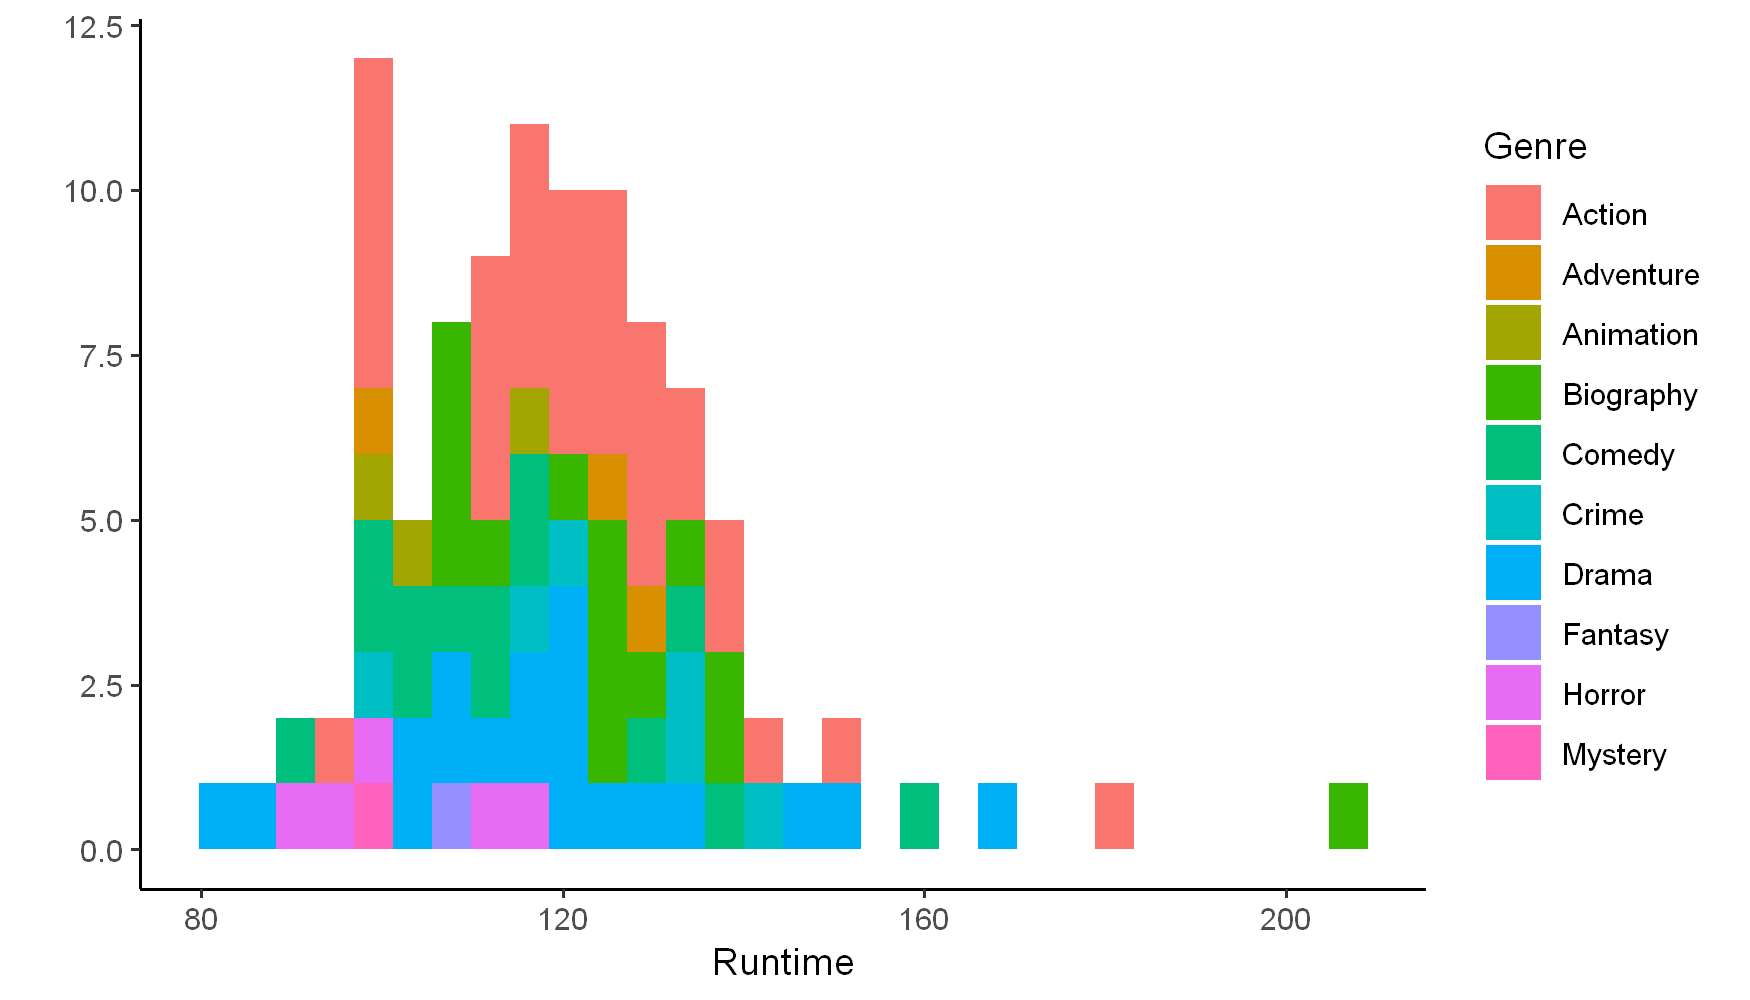

In [178]:
qplot(data = movies_df, Runtime, fill = Genre,bins = 30)+
  theme_classic()

What about runtime vs rating?

<br>
<div class="use_editor"></div>

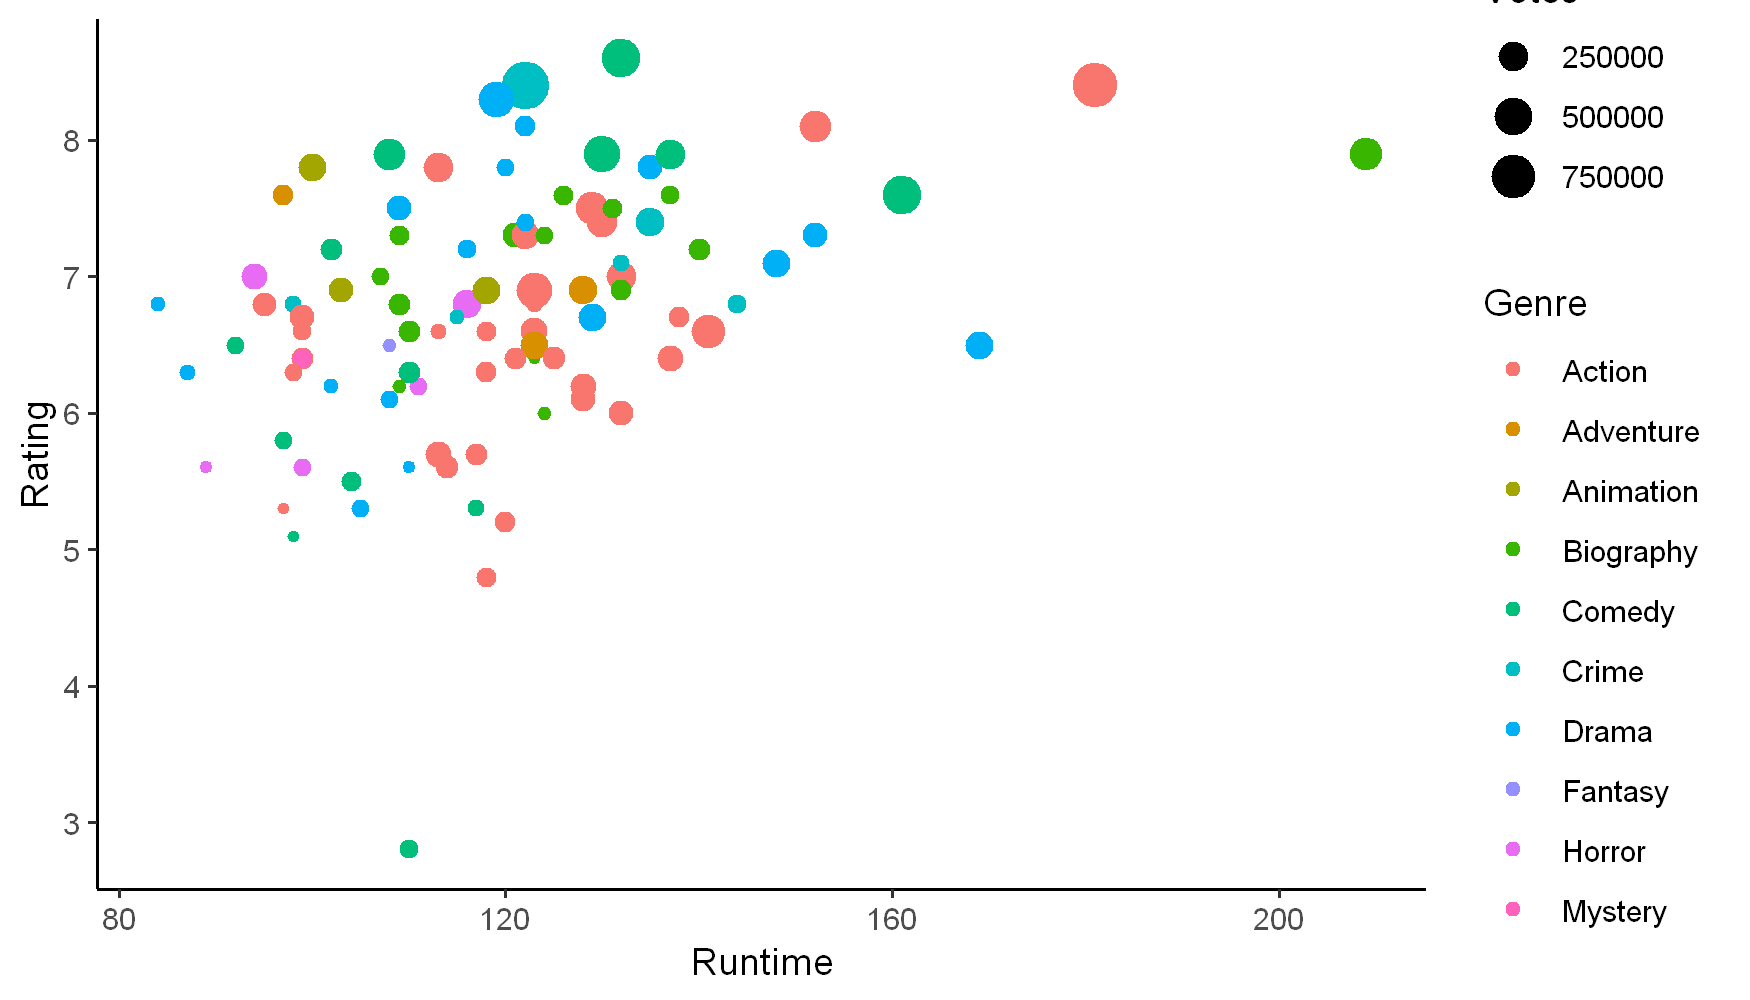

In [179]:
# Plot of runtime vs rating
ggplot(movies_df,aes(x = Runtime,y = Rating))+
  geom_point(aes(size = Votes,col = Genre))+
  theme_classic()

What about runtime vs earnings?

<br>
<div class="use_editor"></div>

Warning message:
"Removed 9 rows containing missing values (geom_point)."


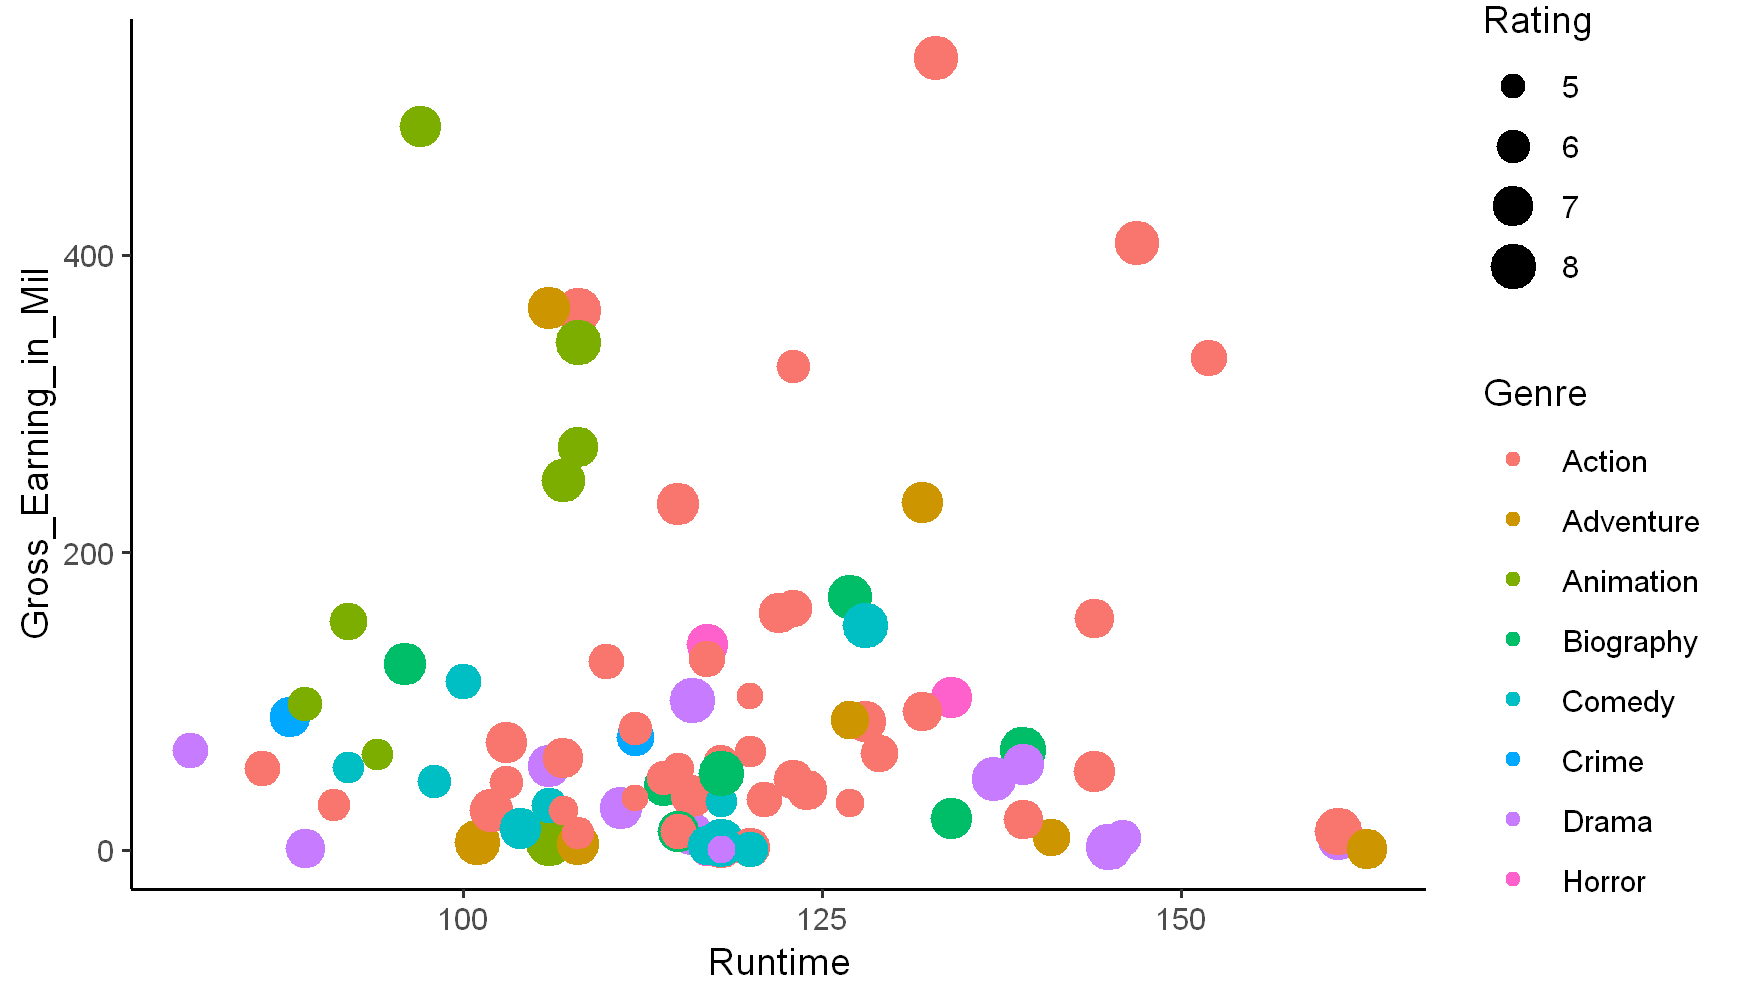

In [246]:
# Plot of runtime vs earnings
ggplot(movies_df, aes(x = Runtime, y = Gross_Earning_in_Mil))+
  geom_point(aes(size = Rating, col = Genre))+
  theme_classic()

Now you have a fair idea of the problems which you might come across when working with time, strings and web scraping and how you can make your way around them. As most of the data on the web is present in an unstructured format, web scraping is a really handy skill for any data scientist.

Now let's get you to play around with data on your own!

# Your lab task: Analyzing film data from 2016!

<br><br><br>
<div class="startTASK"></div>

Scrape data from IMDB on the top 100 movies released in 2016 and answer the questions that follow. Use the url posted below. <br><br>

Same as in the example above, to ensure that the content does not change, the url is copy of the 2016 imdb results saved in my github:

https://raw.githubusercontent.com/Diego-Ibarra/biol3782/main/week8/imdb_100titles_2016.html

<br><br>
<span class="note"></span> If you are curious and you want to run again your code in the live imdb site, use `http://www.imdb.com/search/title?count=100&release_date=2016,2016&title_type=feature` However, you will get different results depending on the updates and changes that imdb does to its database. <span class="important"></span> **DO NOT use this url to compute the answers for your Brightspace quiz, you will get the wrong answers if you do!**
<br><br><br><br>

**HINTS**

For this task you will need...

* Webscraping functions learned in this lab: `read_html()`, `html_nodes()`, `html_node()`, `html_text()`

* Functions commonly used with Regular Expression, as learned above: `gsub()`, `substring()`

* Some of the built-in R functions: `as.numeric()`, `as.factor`, `head()`, `tail()`, `length()`, `summary()`, `n_distinct()`, `str()`, `dim()`, `data.frame()` 

* Some of the functions from the tidyverse: `mutate()`, `group_by()`, ` summarize()`, `filter()`, `arrange()`, `select()`, `na.omit()`, `ggplot()`

<br><br><br>


<span class="important"></span> Remember to check your datasets! You can use `str()` and `dim()` or just look at your raw data to make sure your cleaned data is in the format you want.
<br><br>


<div class="endTASK"></div>
<br><br><br>

<div class="Q"><br><br>

What was the highest ranked film by popularity of 2016? 

<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the CSS selector we use to scrape ranking data? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the title of the sixth highest ranked film of 2016? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the title of the lowest ranked film of 2016? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many observations are there in the webscraped title data object you created? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

In the 19th most popular film of 2016, who was the story about? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Where was the 17th most popular film of 2016 set? 
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the CSS selector we use to scrape runtime data?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many films have no metascore data?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many films are missing gross data values?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

After combining all the scraped datasets, (forming movies_df in our example), how many observations are there?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

After combining all the scraped datasets, (forming movies_df in our example), how many variables are there?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the runtime of the 56th film in the combined dataset (i.e. movies_df)?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What is the genre of the 73rd film in the combined dataset (i.e. movies_df)?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many unique directors are there in the films list?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Which of the folks in the choices below directed more than one film?
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many text characters does the description of the 50th most popular film contain?
    
<br>HINT: You can use the string functions we learned earlier
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many directors have first names beginning with the letter "J"?
    
<br>HINT: You can use the string functions we learned earlier
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many directors have first names whose 2nd letter is "e"?
    
<br>HINT: You can use the string functions we learned earlier
 
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many movies on this list did Lily James appear in?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Which of the films Lily James appeared was the highest rated?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Which movie from which Genre had the 3rd longest runtime?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

In the Runtime of 130-160 mins, which genre has the highest votes?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

In the Runtime of 130-160 mins, who directed the film with the highest votes?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Across all genres, which genre has the highest total gross earnings (combination of all the films) in runtime 100 to 120 mins?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

In the runtime 100 to 120 mins, how much did Horror movies earn?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

How many Crime films with runtimes between 100 to 120 mins earned >$100M?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

What was the most profitable film genre in 2016?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Was the film with the highest number of Votes also the most profitable?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

Which genre made large profits but didn't necessarily garner the most votes?
    
<br><br><div class="qhelp"></div></div>

<div class="Q"><br><br>

If you were to make a movie, what genre would you choose to make the most profit?
    
<br><br><div class="qhelp"></div></div>

In [69]:
cssFile <- '../css/custom.css'
IRdisplay::display_html(readChar(cssFile, file.info(cssFile)$size))

IRdisplay::display_html("<style>.Q::before {counter-increment: question_num;
    content: 'QUESTION ' counter(question_num) ': '; white-space: pre; }.T::before {counter-increment: task_num;
    content: 'Task ' counter(task_num) ': ';</style>")